In [13]:
import pandas as pd
import numpy as np

In [14]:
datafile = r'C:\Users\sarah\OneDrive - James Madison University\Desktop\ISAT 420 Materials\GitHub_Respositories\ISAT_420_S26_Shared\W5_Pandas_Groupby_And_Timeseries\Data\CDO_USW00093736_1955_2025.txt'
df = pd.read_csv(datafile)
df.head()

,STATION ELEVATION LATITUDE LONGITUDE DATE PRCP SNWD SNOW TAVG TMAX TMIN AWND WDF2 WDF5 WSF2 WSF5
0,----------------- ---------- ---------- ------...
1,GHCND:USW00093736 194.8 38.14 -7...
2,GHCND:USW00093736 194.8 38.14 -7...
3,GHCND:USW00093736 194.8 38.14 -7...
4,GHCND:USW00093736 194.8 38.14 -7...


In [15]:
df = pd.read_csv(datafile, sep='\s+', skiprows= [1])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25554 entries, 0 to 25553
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    25554 non-null  object 
 1   ELEVATION  25554 non-null  float64
 2   LATITUDE   25554 non-null  float64
 3   LONGITUDE  25554 non-null  float64
 4   DATE       25554 non-null  int64  
 5   PRCP       25554 non-null  float64
 6   SNWD       25554 non-null  float64
 7   SNOW       25554 non-null  float64
 8   TAVG       25554 non-null  float64
 9   TMAX       25554 non-null  float64
 10  TMIN       25554 non-null  float64
 11  AWND       25554 non-null  float64
 12  WDF2       25554 non-null  int64  
 13  WDF5       25554 non-null  int64  
 14  WSF2       25554 non-null  float64
 15  WSF5       25554 non-null  float64
dtypes: float64(12), int64(3), object(1)
memory usage: 3.1+ MB


In [16]:
df = pd.read_csv(datafile, sep='\s+', na_values=[-9999],skiprows= [1])
df.head()

,STATION,ELEVATION,LATITUDE,LONGITUDE,DATE,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5
0,GHCND:USW00093736,194.8,38.14,-78.45,19560101,NaN,NaN,NaN,NaN,10.0,-1.7,NaN,NaN,NaN,NaN,NaN
1,GHCND:USW00093736,194.8,38.14,-78.45,19560102,NaN,NaN,NaN,NaN,4.4,-3.9,NaN,NaN,NaN,NaN,NaN
2,GHCND:USW00093736,194.8,38.14,-78.45,19560103,NaN,NaN,NaN,NaN,12.8,0.6,NaN,NaN,NaN,NaN,NaN
3,GHCND:USW00093736,194.8,38.14,-78.45,19560104,NaN,NaN,NaN,NaN,8.9,-2.8,NaN,NaN,NaN,NaN,NaN
4,GHCND:USW00093736,194.8,38.14,-78.45,19560105,NaN,NaN,NaN,NaN,11.7,0.0,NaN,NaN,NaN,NaN,NaN


In [27]:
df = pd.read_csv(datafile, sep='\s+',
                 na_values=[-9999.0, -99.0],
                 skiprows = [1],
                 parse_dates=[4])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25554 entries, 0 to 25553
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    25554 non-null  object        
 1   ELEVATION  25554 non-null  float64       
 2   LATITUDE   25554 non-null  float64       
 3   LONGITUDE  25554 non-null  float64       
 4   DATE       25554 non-null  datetime64[ns]
 5   PRCP       23343 non-null  float64       
 6   SNWD       5958 non-null   float64       
 7   SNOW       5970 non-null   float64       
 8   TAVG       2831 non-null   float64       
 9   TMAX       25498 non-null  float64       
 10  TMIN       25496 non-null  float64       
 11  AWND       9914 non-null   float64       
 12  WDF2       9919 non-null   float64       
 13  WDF5       9899 non-null   float64       
 14  WSF2       9920 non-null   float64       
 15  WSF5       9901 non-null   float64       
dtypes: datetime64[ns](1), float64(14), objec

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\gerkentx\AppData\Local\Temp\ipykernel_32108\3586758182.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(datafile, sep='\s+',


In [28]:
df = df.set_index('DATE')
df.head()

,STATION,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5
DATE,,,,,,,,,,,,,,,
1956-01-01,GHCND:USW00093736,194.8,38.14,-78.45,NaN,NaN,NaN,NaN,10.0,-1.7,NaN,NaN,NaN,NaN,NaN
1956-01-02,GHCND:USW00093736,194.8,38.14,-78.45,NaN,NaN,NaN,NaN,4.4,-3.9,NaN,NaN,NaN,NaN,NaN
1956-01-03,GHCND:USW00093736,194.8,38.14,-78.45,NaN,NaN,NaN,NaN,12.8,0.6,NaN,NaN,NaN,NaN,NaN
1956-01-04,GHCND:USW00093736,194.8,38.14,-78.45,NaN,NaN,NaN,NaN,8.9,-2.8,NaN,NaN,NaN,NaN,NaN
1956-01-05,GHCND:USW00093736,194.8,38.14,-78.45,NaN,NaN,NaN,NaN,11.7,0.0,NaN,NaN,NaN,NaN,NaN


In [29]:
df.loc['2017-08-07']

STATION      GHCND:USW00093736
ELEVATION                192.3
LATITUDE               38.1374
LONGITUDE            -78.45513
PRCP                      26.7
SNWD                       NaN
SNOW                       NaN
TAVG                       NaN
TMAX                      25.6
TMIN                      21.1
AWND                       1.5
WDF2                      30.0
WDF5                     320.0
WSF2                       5.8
WSF5                       7.2
Name: 2017-08-07 00:00:00, dtype: object

In [30]:
df.loc['2017-07-01':'2017-07-31']

,STATION,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNWD,SNOW,TAVG,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5
DATE,,,,,,,,,,,,,,,
2017-07-01,GHCND:USW00093736,192.3,38.1374,-78.45513,0.0,NaN,NaN,NaN,34.4,23.3,2.7,190.0,120.0,6.7,8.9
2017-07-02,GHCND:USW00093736,192.3,38.1374,-78.45513,0.0,NaN,NaN,NaN,31.7,20.6,1.5,200.0,210.0,5.8,8.1
2017-07-03,GHCND:USW00093736,192.3,38.1374,-78.45513,0.0,NaN,NaN,NaN,33.9,19.4,0.9,210.0,210.0,5.4,6.3
2017-07-04,GHCND:USW00093736,192.3,38.1374,-78.45513,0.3,NaN,NaN,NaN,32.2,21.1,0.8,210.0,200.0,4.0,5.4
2017-07-05,GHCND:USW00093736,192.3,38.1374,-78.45513,5.3,NaN,NaN,NaN,27.8,22.2,2.0,80.0,60.0,6.3,8.1
2017-07-06,GHCND:USW00093736,192.3,38.1374,-78.45513,0.5,NaN,NaN,NaN,31.7,21.7,1.3,210.0,60.0,5.8,6.7
2017-07-07,GHCND:USW00093736,192.3,38.1374,-78.45513,0.0,NaN,NaN,NaN,33.3,22.8,1.7,200.0,210.0,5.8,8.5
2017-07-08,GHCND:USW00093736,192.3,38.1374,-78.45513,0.0,NaN,NaN,NaN,32.8,20.0,1.6,320.0,330.0,5.8,8.1
2017-07-09,GHCND:USW00093736,192.3,38.1374,-78.45513,0.0,NaN,NaN,NaN,31.1,17.2,0.9,160.0,160.0,5.4,6.3


<Axes: xlabel='DATE'>

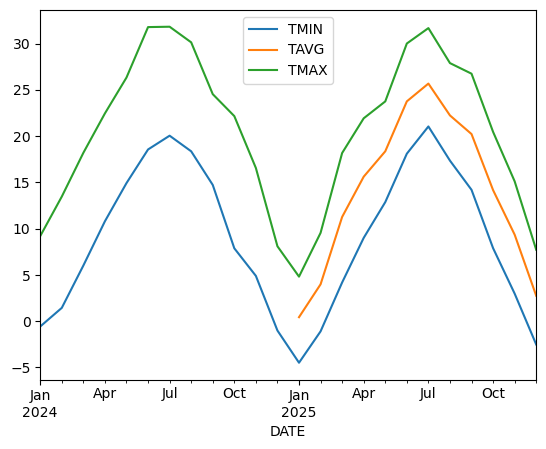

In [38]:
df_mm = df[['TMIN', 'TAVG', 'TMAX']].resample('MS').mean()
df_mm.loc['2024':'2025'].plot()


<Axes: xlabel='DATE'>

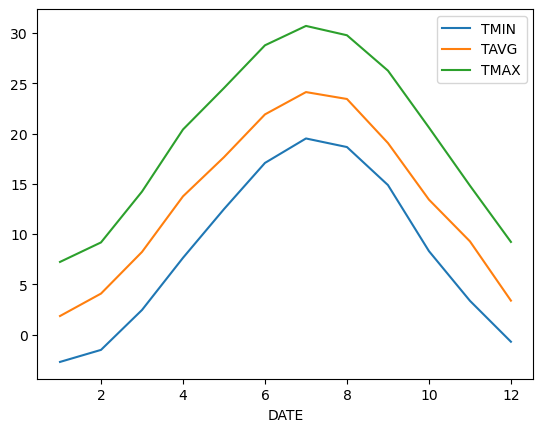

In [40]:
df[['TMIN', 'TAVG', 'TMAX']].groupby(df.index.month).mean().plot()